In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tifffile

In [23]:
def get_mask(id_):
    train_csv = pd.read_csv('./train.csv')
    image = tifffile.imread('./{}.tiff'.format(id_))
    mask_cod  = train_csv.loc[train_csv['id'] == id_]['encoding'].values[0]
    image = image[0,0,:,:,:]
    image = image.transpose(1,2,0)
    print(len(mask_cod))
    mask = np.zeros((image.shape[0]*image.shape[1]), dtype=np.uint8)
    rle_mask = mask_cod.split()
    positions = map(int, rle_mask[::2])
    lengths = map(int, rle_mask[1::2])
    for pos, le in zip(positions, lengths):
        mask[pos-1:pos+le-1] = 1
   
    mask = mask.reshape((image.shape[1], image.shape[0]))

    return image, mask.T

In [24]:
image, mask = get_mask("1e2425f28")
print(image.shape)

969492
(26780, 32220, 3)


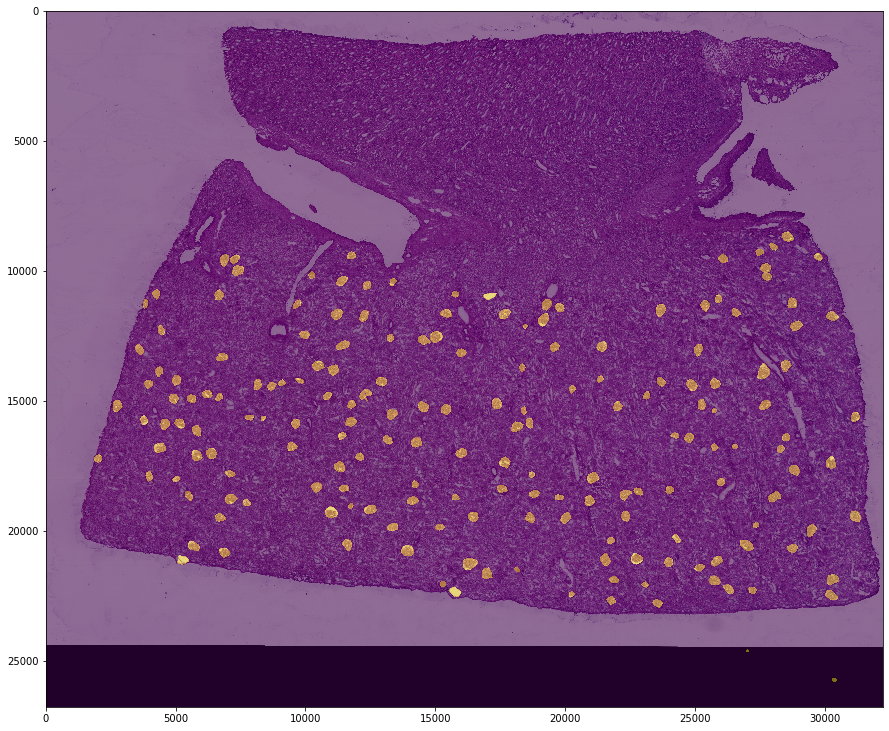

In [41]:
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.imshow(mask,alpha=0.5)
plt.show()

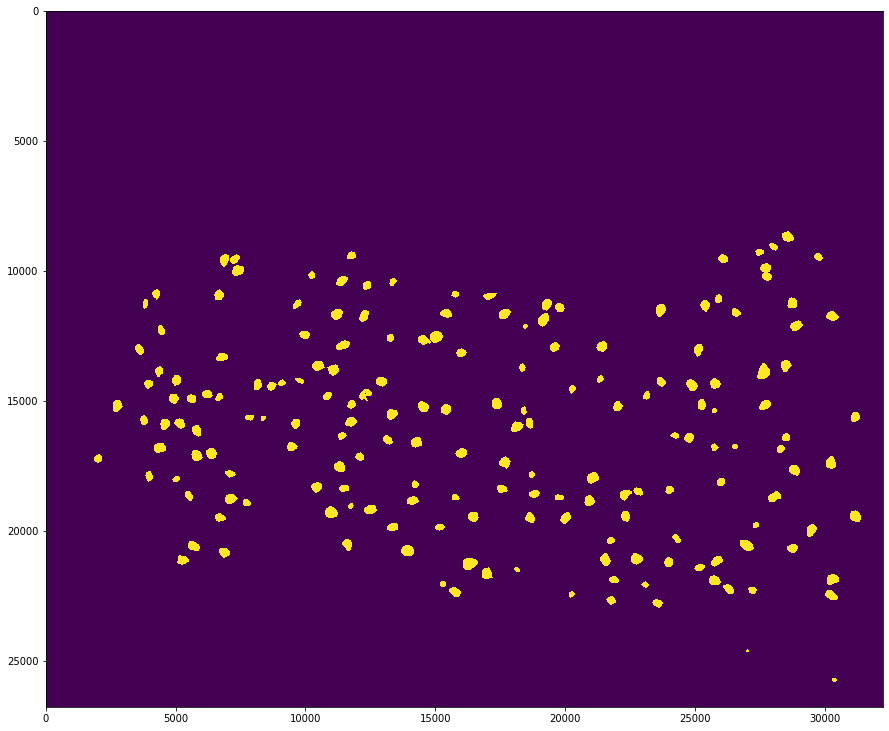

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(mask)